In [1]:
from pandas import read_csv
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import statistics
from statsmodels.tsa.stattools import adfuller, kpss, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [2]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [3]:
mape_list = []
rmse_list = []
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mape_list.append(mape)
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    rmse_list.append(rmse)
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr})

In [4]:
def train_arima(df, index=0):
    train, test = train_test_split(df, test_size=0.2, shuffle=False)
    model = pm.auto_arima(train.values, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=1, 
                      trace=False,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
#     print("Data " + str(index))
#     print(forecast_accuracy(model.predict(n_periods=test.shape[0]), test.values))
    forecast_accuracy(model.predict(n_periods=test.shape[0]), test.values)
#     print("\n")

In [69]:
def learn(all_num, sample_size, ts):
    num = [str(i) for i in range(all_num)]
    p1 = [read_csv('ics_data_preprocessed/06_Smart_Meter_45/Q1/' + str(ts) + '/' + n + '.csv', squeeze=True, parse_dates=['ts'], index_col='ts') for n in num]

    p1 = [prepare_data(df, sample_size) for df in p1]
    p1 = sum(p1, [])
    
    if not p1:
        print("Not enough data")
        return
    else:
        print("Data count: ", len(p1))

    for df in p1:
        train_arima(df)

In [70]:
def prepare_data(df, num_elements=50):
    new_data = []
    length = df.shape[0]
    current_index = 0
    step = int(0.2 * num_elements)
    while(current_index <= length - num_elements):
        new_data.append(df[current_index:current_index+num_elements])
        current_index += step
    return new_data

In [71]:
learn(22, 50, 1000)
print(sum(mape_list) / len(mape_list))
print(sum(rmse_list) / len(rmse_list))
mape_list = []
rmse_list = []

Data count:  246


/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/

0.05613474306184106
13.75799090216318


In [72]:
learn(22, 400, 1000)
print(sum(mape_list) / len(mape_list))
print(sum(rmse_list) / len(rmse_list))
mape_list = []
rmse_list = []

Data count:  8
0.17350952360580504
45.4621579648964


In [73]:
learn(141, 50, 1500)
print(sum(mape_list) / len(mape_list))
print(sum(rmse_list) / len(rmse_list))
mape_list = []
rmse_list = []

Data count:  2472


/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/

0.07196146895927681
14.247817275869226


In [74]:
learn(902, 50, 2000)
print(sum(mape_list) / len(mape_list))
print(sum(rmse_list) / len(rmse_list))
mape_list = []
rmse_list = []

Data count:  20727


/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/

0.31197988024768725
33.249681268653624


In [75]:
learn(19, 100, 5000)
print(sum(mape_list) / len(mape_list))
print(sum(rmse_list) / len(rmse_list))
mape_list = []
rmse_list = []

Data count:  1440


/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/

0.08343895674209847
29.458735230341745


In [76]:
learn(20, 450, 15000)
print(sum(mape_list) / len(mape_list))
print(sum(rmse_list) / len(rmse_list))
mape_list = []
rmse_list = []

Data count:  143


/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/anna/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/anna/anaconda3/

0.10486659457959138
60.10496981485017


In [116]:
num = [str(i) for i in range(19)]
p1 = [read_csv('ics_data_preprocessed/06_Smart_Meter_45/P1/' + '1000' + '/' + n + '.csv', squeeze=True, parse_dates=['ts'], index_col='ts') for n in num]
p1 = [prepare_data(df, 100) for df in p1]
p1 = sum(p1, [])

df = p1[1]

train, test = train_test_split(df, test_size=0.2, shuffle=False)
model = pm.auto_arima(train.values, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=1, 
                      trace=False,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
forecast_accuracy(model.predict(n_periods=test.shape[0]), test.values)

{'mape': 0.0036993722218362094,
 'me': 0.25973062231587674,
 'mae': 1.4507259589094332,
 'mpe': 0.0006932363071531226,
 'rmse': 2.054137218109934,
 'corr': 0.464230642128129}

In [117]:
preds, conf_int = model.predict(n_periods=test.shape[0], return_conf_int=True, alpha=0.1)

In [118]:
lower_series = pd.Series(conf_int[:, 0], index=test.index)
upper_series = pd.Series(conf_int[:, 1], index=test.index)

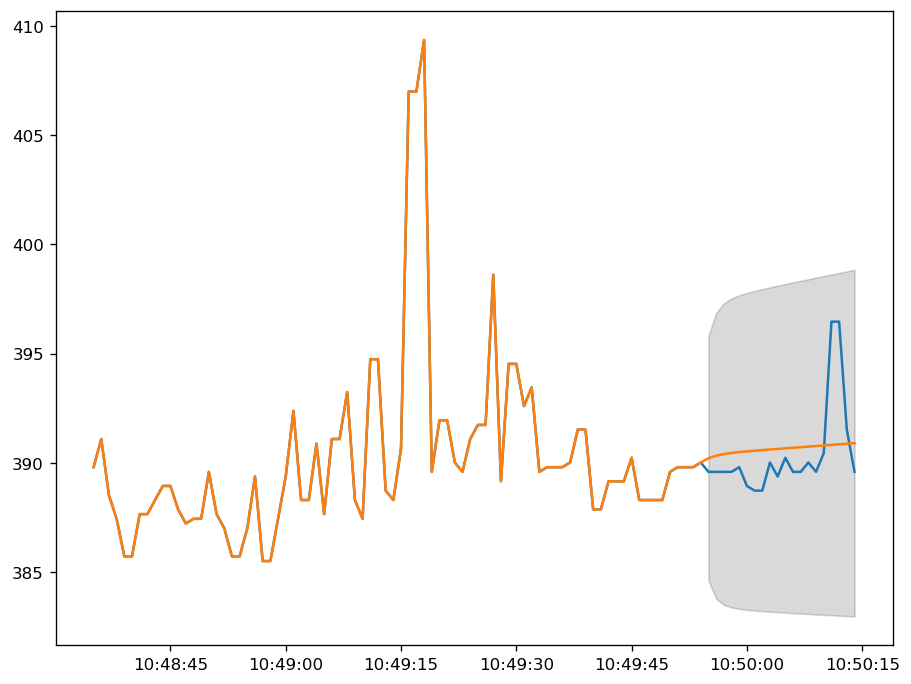

In [119]:
plt.plot(df)
plt.plot(train.append(pd.Series(model.predict(n_periods=test.shape[0]), index=test.index)))
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

In [124]:
num = [str(i) for i in range(19)]
p1 = [read_csv('ics_data_preprocessed/06_Smart_Meter_45/P1/' + '5000' + '/' + n + '.csv', squeeze=True, parse_dates=['ts'], index_col='ts') for n in num]
p1 = [prepare_data(df, 1000) for df in p1]
p1 = sum(p1, [])

df = p1[0]

train, test = train_test_split(df, test_size=0.2, shuffle=False)
model = pm.auto_arima(train.values, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=1, 
                      trace=False,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
forecast_accuracy(model.predict(n_periods=test.shape[0]), test.values)

{'mape': 0.5205317296674778,
 'me': 34.43185038533942,
 'mae': 466.08969550475604,
 'mpe': 0.2626799846047911,
 'rmse': 483.51978912293174,
 'corr': 0.35264066609356104}

In [125]:
preds, conf_int = model.predict(n_periods=test.shape[0], return_conf_int=True, alpha=0.1)

In [126]:
lower_series = pd.Series(conf_int[:, 0], index=test.index)
upper_series = pd.Series(conf_int[:, 1], index=test.index)

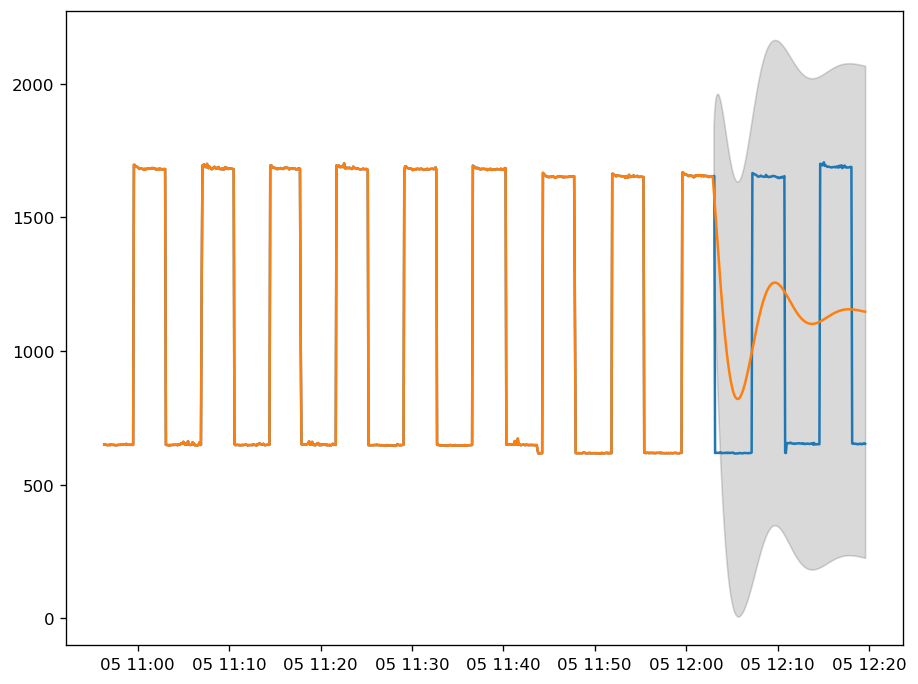

In [127]:
plt.plot(p1[0])
plt.plot(train.append(pd.Series(model.predict(n_periods=test.shape[0]), index=test.index)))
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)